# Integration

date 28 Sept 2021


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create a data
def function_poly(x):
    y = x**3 - x**2 + x + 1  # choose your function
    return y

In [3]:
def integral_std(i, f):
    Ii = i**4/4 - i**3/3 + i**2/2 + i
    If = f**4/4 - f**3/3 + f**2/2 + f
    
    return If-Ii

In [4]:
integral_std(-1,1)

1.3333333333333335

In [5]:
# descrete data points
x = np.arange(-2000, 2001)*0.001
y = function_poly(x)

In [6]:
x

array([-2.   , -1.999, -1.998, ...,  1.998,  1.999,  2.   ])

In [7]:
y

array([-13.        , -12.983007  , -12.96602799, ...,   6.98201999,
         6.991005  ,   7.        ])

<IPython.core.display.Javascript object>


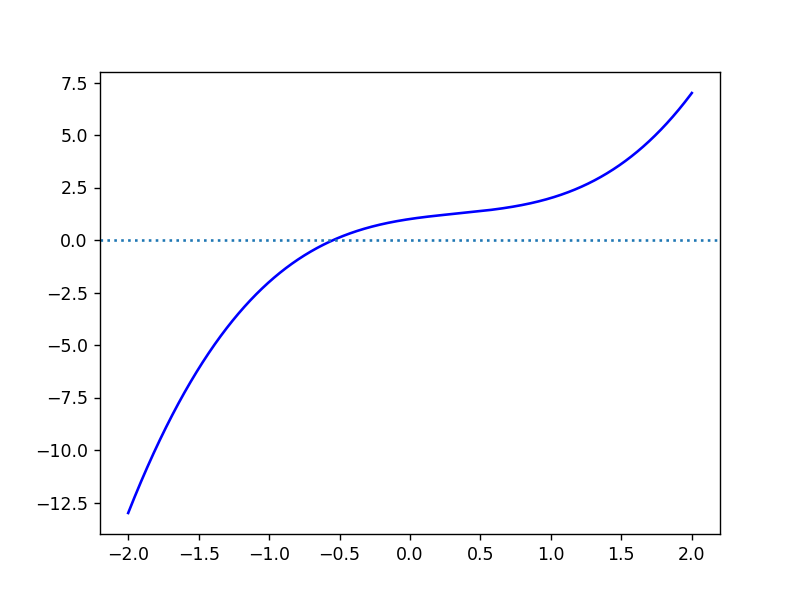

In [8]:
# plot the data
plt.plot(x, y, c = 'b')
plt.axhline(0, ls =':')
plt.show()

<IPython.core.display.Javascript object>


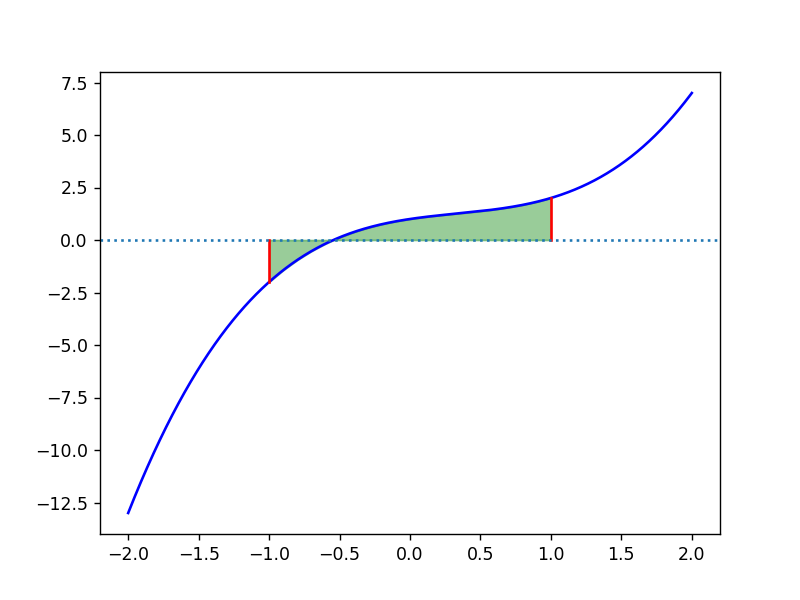

In [9]:
plt.figure()
# plot the data
plt.plot(x, y, c = 'b')
plt.plot([-1, -1], [function_poly(-1), 0], color = 'r')
plt.plot([1, 1], [function_poly(1), 0], color = 'r')
x_new =np.arange(-10, 11)*0.1
y_new = function_poly(x_new)
plt.fill_between(x_new, 0, y_new, color = 'g', alpha = 0.4)
plt.axhline(0, ls =':')
plt.show()

<IPython.core.display.Javascript object>


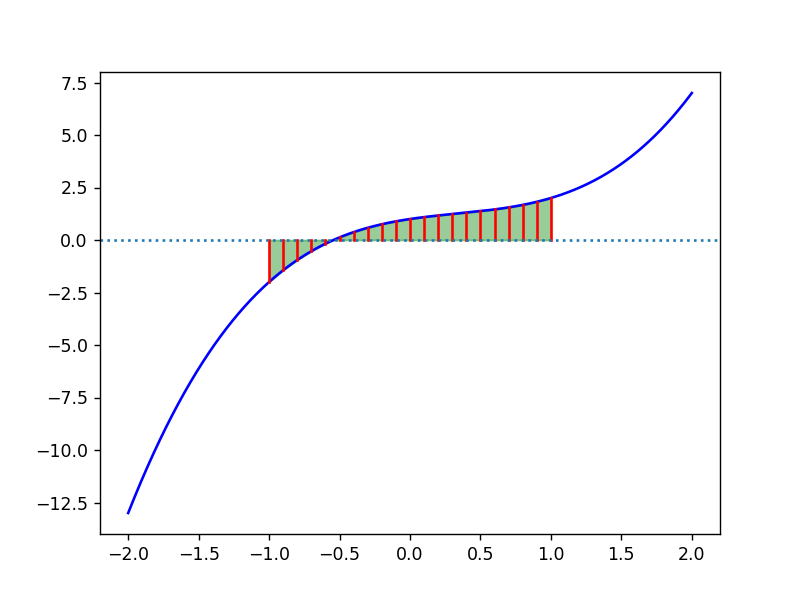

In [10]:
plt.figure()
# plot the data
plt.plot(x, y, c = 'b')
x_new =np.arange(-10, 11)*0.1
y_new = function_poly(x_new)
for x0, y0 in zip(x_new, y_new):
    plt.plot([x0, x0], [y0, 0], color = 'r')

plt.fill_between(x_new, 0, y_new, color = 'g', alpha = 0.4)
plt.axhline(0, ls =':')
plt.show()

## Newton-cotes methods

### 1) Rectangualr method

Draw rectangles. Count area.

$\int_{a}^{b}{f(x)dx} \approx (b-a)f\big((a+b)/2 \big)$

### 2) Trapazoidal rule

Draw trapezoids. Cound area. Equivalent to linear interpolation from point a to b.

$\int_{a}^{b}{f(x)dx} \approx (b-a)(f(a)+f(b))/2$

### 3) Simpson's rule (1/3rd)

Approximate function using quadratic function (i.e 2 degree polynomial).

$\int_{a}^{b}{f(x)dx} \approx \frac{(b-a)}{6}\Big[f(a)+4f\big(\frac{(a+b)}{2}\big) + f(b)\Big]$




In [11]:
#form wikipedia

<img src="wiki.png">

In [12]:
# integration by simpson's 1/3rd rule
h = 0.1
array = np.arange(-1, 1+0.5*h, h)

sum = 0
for i in range(len(array)-1): 
    a = array[i]
    b = array[i+1]
    sum = sum + (b-a)/6 *(function_poly(a) + function_poly(b) + 4* function_poly((a+b)/2))

print(sum)

1.3333333333333326


In [13]:
sum - integral_std(-1,1)

-8.881784197001252e-16

### simplyfying trapazoidal rule
integration from A, B

interval h

n point $n = (B-A)/h$

x point $x_1$, $x_2$, $x_n$

$I_1 = (x_2-x_1) \Big (0.5 f(x_1) + 0.5 f(x_2) \Big)$

$I_2 = (x_3-x_2) \Big (0.5 f(x_2) + 0.5 f(x_3) \Big)$

$I_3 = (x_4-x_3) \Big (0.5 f(x_3) + 0.5 f(x_4) \Big)$

...


$I_1 = h \Big (0.5 f(x_1) + 0.5 f(x_2) \Big)$

$I_2 = h \Big (0.5 f(x_2) + 0.5 f(x_3) \Big)$

$I_3 = h \Big (0.5 f(x_3) + 0.5 f(x_4) \Big)$

...

Addition

$I = I_1 + I_2 + ... + I_n$ 

$ I = h \Big( 0.5 f(x_1) + f(x_2) + f(x_3) + ... + f(x_{n-1}) + 0.5 f(x_n)  \Big)$ 

$ I  = 0.5h \Big( f(x_1) + f(x_n) \Big) + h \sum_{i =2}^{n-1}   f(x_i)$


In [14]:
# trapazoidal rule 

h = 0.1
i = -2
f = 1
array_inter = np.arange(i+h, f-0.5*h, h)
I2= h* np.sum(function_poly(array_inter))
I1 = 0.5*h *(function_poly(i) + function_poly(f))
I = I1+I2

In [15]:
I

-5.26249999999999

In [16]:
I1

-0.55

In [17]:
integral_std(i, f)

-5.249999999999999

In [18]:
# function trapazoidal rule 

def trap(i, f, h):
    array_inter = np.arange(i+h, f-0.5*h, h)
    I2= h* np.sum(function_poly(array_inter))
    I1 = 0.5*h *(function_poly(i) + function_poly(f))
    I = I1+I2
    
    return I
    

In [19]:
trap(-2, 1, 0.01)

-5.25012499999999

## Gauss Quadrature Method 

For symetric interval [-1, 1] for polynomial functions.

$\int_{-1}^{1}{f(x)dx} \approx \sum_{i=1}^{n} w_i f(x_i)$
 
